### Backtest SwissFinBERT Performance

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_excel("https://raw.githubusercontent.com/AlGatone21/SwissFinBERT/main/Backtest/Backtest_data.xlsx")

In [3]:
data = data[["t",'Date', "return", "Company", 'predictions']]
data.head()


,t,Date,return,Company,predictions
0,1,2010-01-08,5.039917,ABB,0.248800
1,2,2010-01-15,-2.090256,ABB,-0.110904
2,3,2010-01-22,-6.550211,ABB,0.311795
3,4,2010-01-29,0.986492,ABB,0.422093
4,5,2010-02-05,-3.393323,ABB,0.453528


In [4]:
def determine_strategy(prediction): # 0.5% predicted return is the threshold for a signal
    if prediction > 0.5:
        return "BUY"
    elif prediction > -0.5:
        return "HOLD"
    else:
        return "SELL"

data["Strategy"] = data["predictions"].apply(determine_strategy)

data.head()

,t,Date,return,Company,predictions,Strategy
0,1,2010-01-08,5.039917,ABB,0.248800,HOLD
1,2,2010-01-15,-2.090256,ABB,-0.110904,HOLD
2,3,2010-01-22,-6.550211,ABB,0.311795,HOLD
3,4,2010-01-29,0.986492,ABB,0.422093,HOLD
4,5,2010-02-05,-3.393323,ABB,0.453528,HOLD


In [5]:
from tqdm import tqdm

# List of company names
companies = [
    'ABB', 'Alcon', 'Adecco', 'Geberit', 'Givaudan', 'LafargeHolcim',
    'Lonza', 'Nestle', 'Novartis', 'Richemont', 'Roche', 'SGS', 'Sika',
    'Swatch', 'SwissLife', 'SwissRe', 'Swisscom', 'UBS', 'Zuerich'
]

performance = pd.DataFrame(range(0,731), columns=["t"])

# Loop through each company to initialize and calculate values
for company in tqdm(companies, desc="Processing companies"):
    performance[f"{company}_holding"] = 100
    performance[f"{company}_strategy"] = 100
    performance[f"{company}_trade"] = "HOLD"
    
    for t in range(1, len(performance)):
        try:
            performance.loc[t, f"{company}_return"] = data[(data["t"] == performance.loc[t, "t"]) & (data["Company"] == company)]["return"].values[0]
            performance.loc[t, f"{company}_trade"] = data[(data["t"] == performance.loc[t, "t"]) & (data["Company"] == company)]["Strategy"].values[0]
        except:
            pass

performance.head()

Processing companies: 100%|██████████| 19/19 [00:45<00:00,  2.39s/it]


,t,ABB_holding,ABB_strategy,ABB_trade,ABB_return,Alcon_holding,Alcon_strategy,Alcon_trade,Alcon_return,Adecco_holding,...,Swisscom_trade,Swisscom_return,UBS_holding,UBS_strategy,UBS_trade,UBS_return,Zuerich_holding,Zuerich_strategy,Zuerich_trade,Zuerich_return
0,0,100,100,HOLD,NaN,100,100,HOLD,NaN,100,...,HOLD,NaN,100,100,HOLD,NaN,100,100,HOLD,NaN
1,1,100,100,HOLD,5.039917,100,100,HOLD,NaN,100,...,HOLD,-1.182393,100,100,HOLD,6.761774,100,100,HOLD,1.529052
2,2,100,100,HOLD,-2.090256,100,100,HOLD,NaN,100,...,HOLD,-1.018330,100,100,HOLD,-6.449733,100,100,HOLD,0.258178
3,3,100,100,HOLD,-6.550211,100,100,HOLD,NaN,100,...,HOLD,0.437246,100,100,BUY,-7.267081,100,100,HOLD,-2.618028
4,4,100,100,HOLD,0.986492,100,100,HOLD,NaN,100,...,HOLD,-0.717026,100,100,BUY,-6.028131,100,100,HOLD,0.308511


In [6]:
performance.fillna(0, inplace=True) # Fill NaN values with 0
performance.tail()

,t,ABB_holding,ABB_strategy,ABB_trade,ABB_return,Alcon_holding,Alcon_strategy,Alcon_trade,Alcon_return,Adecco_holding,...,Swisscom_trade,Swisscom_return,UBS_holding,UBS_strategy,UBS_trade,UBS_return,Zuerich_holding,Zuerich_strategy,Zuerich_trade,Zuerich_return
726,726,100,100,HOLD,3.076469,100,100,BUY,1.639340,100,...,BUY,-1.085688,100,100,HOLD,6.477911,100,100,HOLD,0.665448
727,727,100,100,HOLD,2.245597,100,100,HOLD,-3.986614,100,...,HOLD,-0.313604,100,100,SELL,0.765512,100,100,HOLD,2.712558
728,728,100,100,HOLD,5.004167,100,100,BUY,4.595883,100,...,HOLD,-0.550534,100,100,HOLD,2.558976,100,100,HOLD,-1.353752
729,729,100,100,SELL,-1.350283,100,100,HOLD,0.121215,100,...,HOLD,0.711745,100,100,SELL,2.690058,100,100,HOLD,-0.854890
730,730,100,100,HOLD,0.107356,100,100,HOLD,-0.665864,100,...,HOLD,-0.667451,100,100,HOLD,-0.911162,100,100,HOLD,-0.249604


In [7]:
# Loop through each company to calculate the holding and strategy values
for company in companies:
    holding_col = f"{company}_holding"
    strategy_col = f"{company}_strategy"
    return_col = f"{company}_return"
    trade_col = f"{company}_trade"
    
    for t in tqdm(range(1, len(performance["t"]))):
        try:
            performance.loc[t, holding_col] = performance.loc[t-1, holding_col] * (1 + (performance.loc[t, return_col]/100))
            performance.loc[t, strategy_col] = performance.loc[t-1, strategy_col] * (1 + (performance.loc[t, return_col]/100) * (1 if performance.loc[t, trade_col] == "BUY" else 0 if performance.loc[t, trade_col] == "HOLD" else -1))
        except:
            performance.loc[t, holding_col] = performance.loc[t-1, holding_col]
            performance.loc[t, strategy_col] = performance.loc[t-1, strategy_col]

  0%|          | 0/730 [00:00<?, ?it/s]C:\Users\aless\AppData\Local\Temp\ipykernel_32440\1485881574.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '105.03991745499552' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  performance.loc[t, holding_col] = performance.loc[t-1, holding_col] * (1 + (performance.loc[t, return_col]/100))
C:\Users\aless\AppData\Local\Temp\ipykernel_32440\1485881574.py:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '102.02236379735963' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  performance.loc[t, strategy_col] = performance.loc[t-1, strategy_col] * (1 + (performance.loc[t, return_col]/100) * (1 if performance.loc[t, trade_col] == "BUY" else 0 if performance.loc[t, trade_col] == "HOLD" else -1))
 65%|██████▍   

In [ ]:
# combine the holding and strategy values for each company
performance["Holding"] = performance[[f"{company}_holding" for company in companies]].sum(axis=1)/19
performance["Strategy"] = performance[[f"{company}_strategy" for company in companies]].sum(axis=1)/19

In [ ]:
# add date column
performance["date"] = ["2010-01-01 00:00:00"] + data["Date"].unique().tolist()
performance["date"] = pd.to_datetime(performance["date"])
performance.tail()

,t,ABB_holding,ABB_strategy,ABB_trade,ABB_return,Alcon_holding,Alcon_strategy,Alcon_trade,Alcon_return,Adecco_holding,...,UBS_strategy,UBS_trade,UBS_return,Zuerich_holding,Zuerich_strategy,Zuerich_trade,Zuerich_return,Holding,Strategy,date
726,726,185.566971,584.270875,HOLD,3.076469,134.438475,183.928857,BUY,1.639340,76.251202,...,878.847150,HOLD,6.477911,198.650490,280.883518,HOLD,0.665448,251.312670,497.069019,2023-12-01
727,727,189.734057,584.270875,HOLD,2.245597,129.078931,183.928857,HOLD,-3.986614,75.397505,...,872.119473,SELL,0.765512,204.039001,280.883518,HOLD,2.712558,255.391527,495.959031,2023-12-08
728,728,199.228667,584.270875,HOLD,5.004167,135.011248,192.382012,BUY,4.595883,76.178546,...,872.119473,HOLD,2.558976,201.276819,280.883518,HOLD,-1.353752,265.641205,496.952182,2023-12-15
729,729,196.538516,592.160187,SELL,-1.350283,135.174902,192.382012,HOLD,0.121215,74.162381,...,848.658949,SELL,2.690058,199.556123,280.883518,HOLD,-0.854890,264.476068,496.788132,2023-12-22
730,730,196.749512,592.160187,HOLD,0.107356,134.274821,192.382012,HOLD,-0.665864,74.961580,...,848.658949,HOLD,-0.911162,199.058022,280.883518,HOLD,-0.249604,264.679633,496.788132,2023-12-29


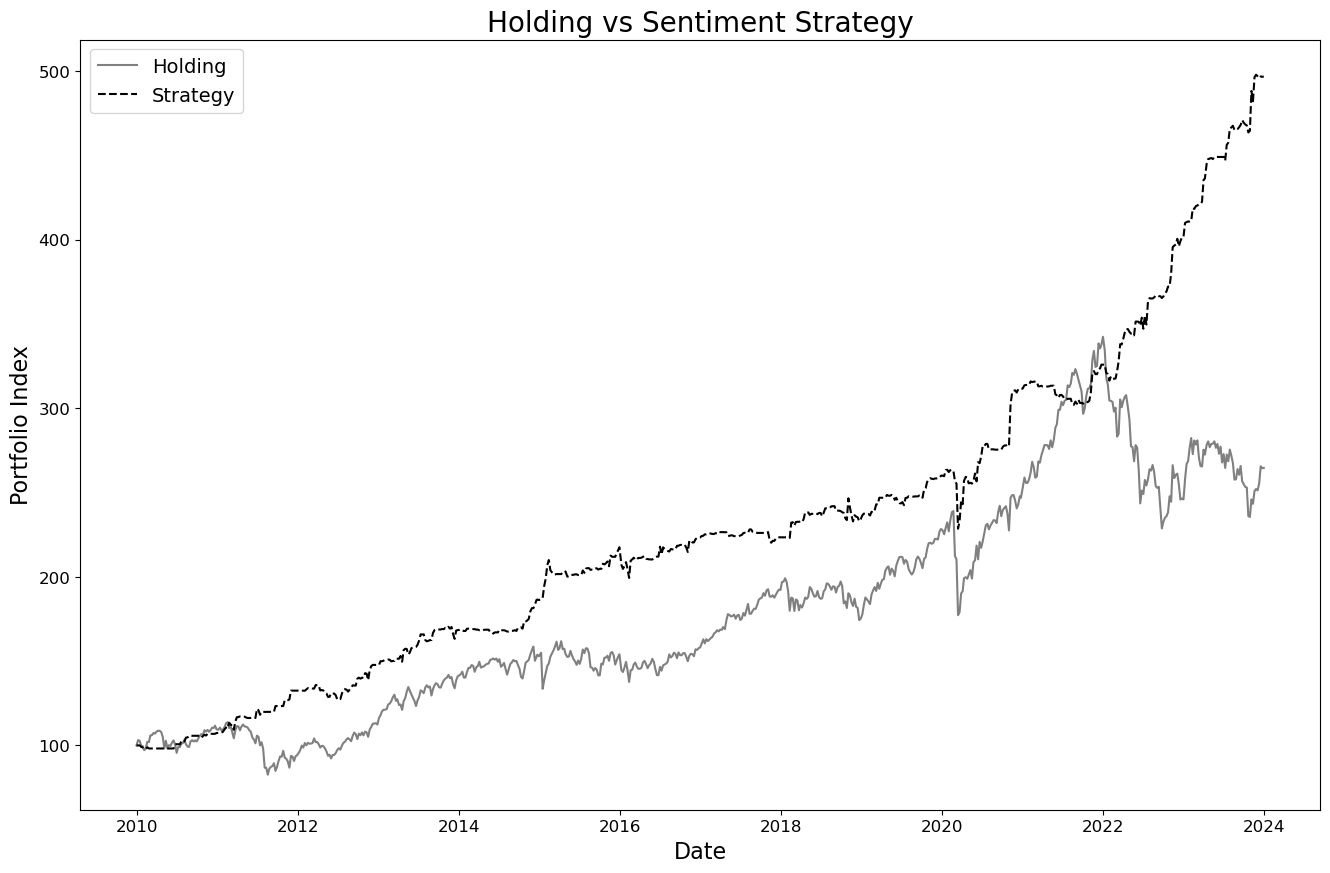

In [ ]:
# plot the performance of the strategy vs holding 

plt.figure(figsize=(16, 10))
plt.plot(performance["date"], performance["Holding"], label="Holding", color='grey')
plt.plot(performance["date"], performance["Strategy"], label="Strategy", color='black', linestyle='dashed')
plt.title("Holding vs Sentiment Strategy", fontsize=20)
plt.xlabel("Date", fontsize=16)
plt.ylabel("Portfolio Index", fontsize=16)
plt.legend(fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()